# **CodSoft Internship Task 3: Iris Flower Classification**

# Importing Libraries

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Reading Data

In [3]:
# read data
df = pd.read_csv("/content/IRIS.zip")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Preprocessing

In [4]:
# figure out the number of rows and columns in the dataframe
df.shape

(150, 5)

In [5]:
# check out info on the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# check for any missing values
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
# show statistics of the dataframe
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# replace strings with numericals for simplicity in model training
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df

<ipython-input-8-4802818b6591>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
<ipython-input-8-4802818b6591>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"].replace({"Iris-setosa":0 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#Explonatory Data Analysis (EDA)

1. Species Measurements Correlation

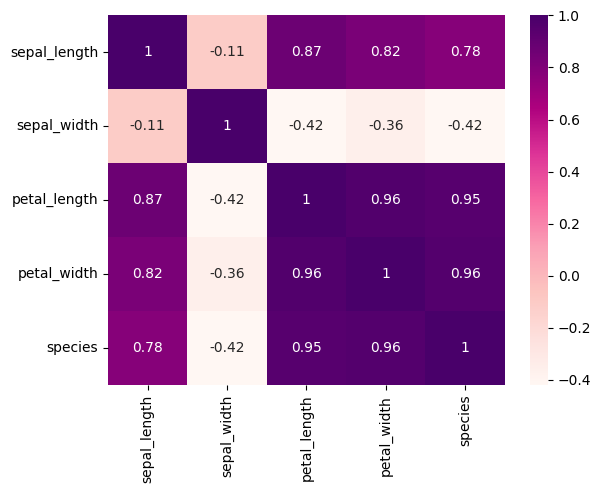

In [9]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="RdPu", annot=True)
# displaying heatmap
plt.show()

2.Pairwise Feature Correlation (Excluding Species)

<Figure size 400x300 with 0 Axes>

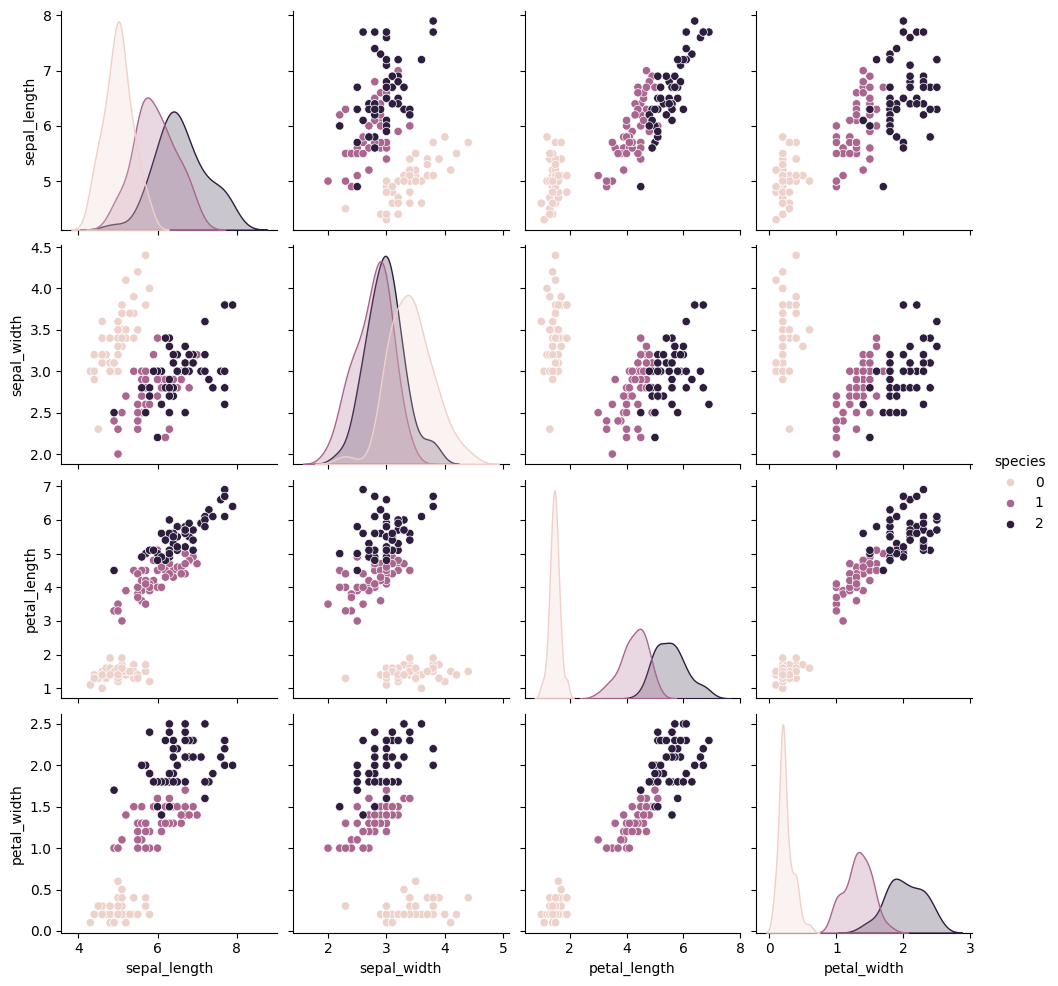

In [10]:
# show the relation between each column excep species which lies on top of each visualization
plt.figure(figsize=(4, 3))
sns.pairplot(df, hue='species')
plt.show()

3.Sepal Length Distribution Analysis

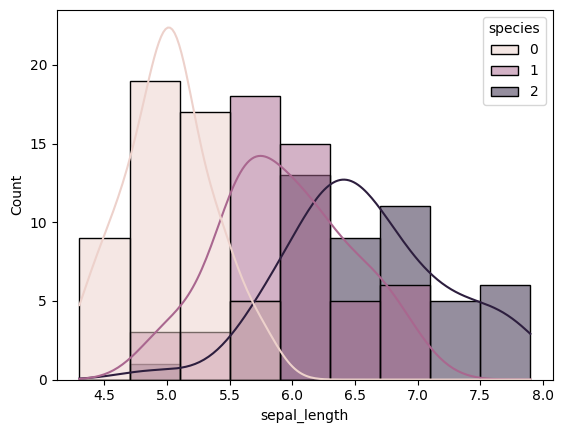

In [11]:
# create histogram of sepal_length with species on top of it
sns.histplot(data=df, x='sepal_length', kde=True, hue='species')
plt.show()

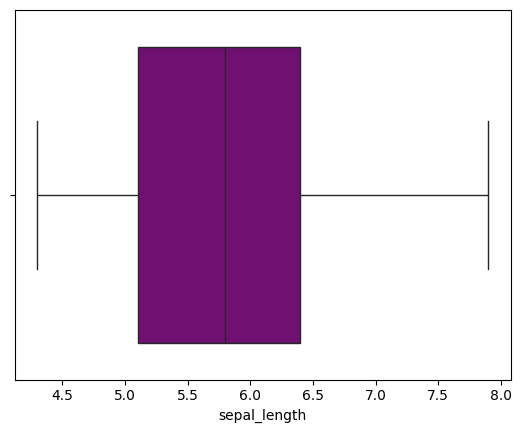

In [12]:
# create box plot to show distribution of data in sepal_length column
sns.boxplot(data=df, x='sepal_length', color = 'Purple')
plt.show()

4. Sepal Width Distribution Analysis

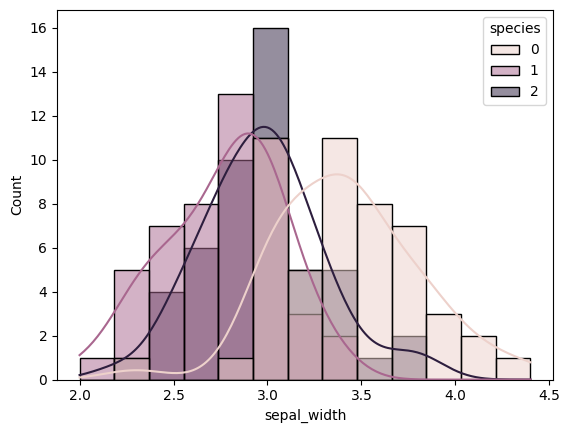

In [13]:
# create histogram of sepal_width with species on top of it
sns.histplot(data=df, x='sepal_width', kde=True, hue='species')
plt.show()

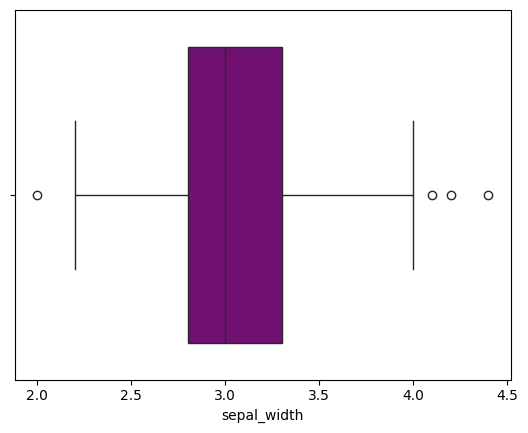

In [14]:
# create box plot to show distribution of data in sepal_width column
sns.boxplot(data=df, x='sepal_width', color = 'Purple')
plt.show()

5.Petal Length Distribution Analysis

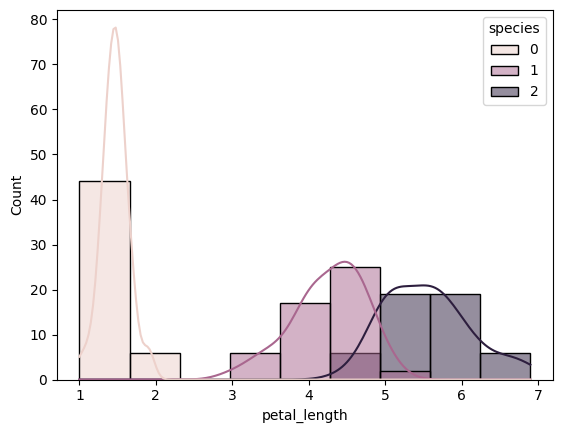

In [15]:
# create histogram of petal_length with species on top of it
sns.histplot(data=df, x='petal_length', kde=True, hue='species')
plt.show()

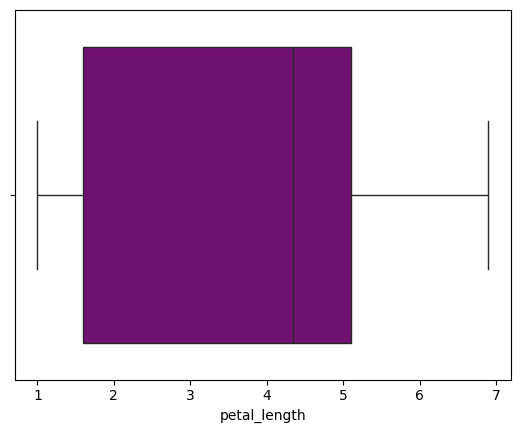

In [16]:
# create box plot to show distribution of data in petal_length column
sns.boxplot(data=df, x='petal_length', color = 'Purple')
plt.show()

6.Petal Width Distribution Analysis

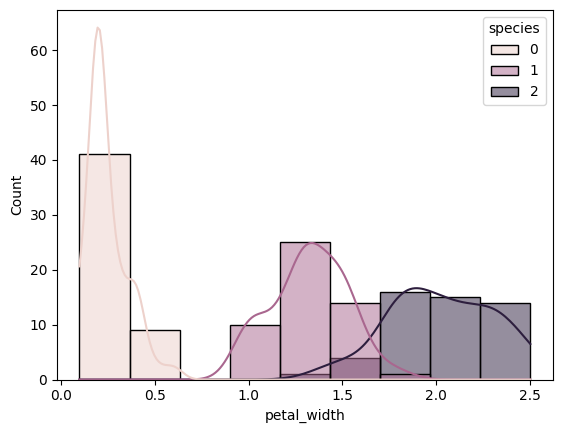

In [17]:
# create histogram of petal_width with species on top of it
sns.histplot(data=df, x='petal_width', kde=True, hue='species')
plt.show()

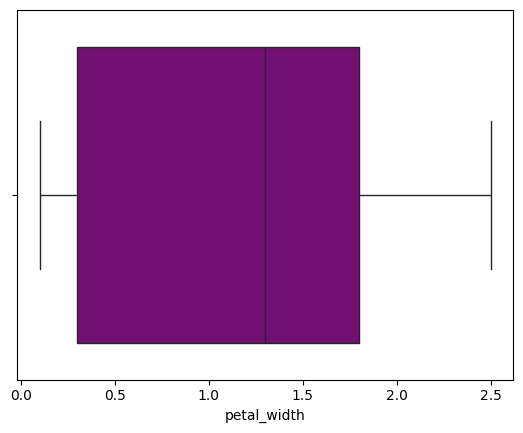

In [18]:
# create box plot to show distribution of data in petal_width column
sns.boxplot(data=df, x='petal_width', color = 'Purple')
plt.show()

7. Count of Species in Dataframe

<ipython-input-19-46c001c5bd8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['species'] , data = df, palette = custom_palette)


<Axes: xlabel='species', ylabel='count'>

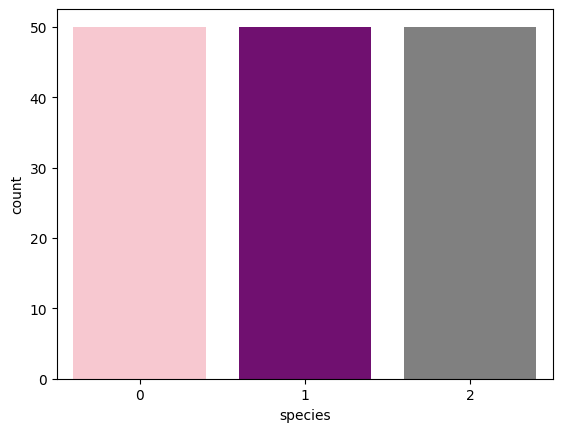

In [19]:
# show histogram to show how many entries lie for each species in the dataframe
custom_palette = ["Pink", "Purple", "Gray"]
sns.countplot(x = df['species'] , data = df, palette = custom_palette)

#Modelling Techniques

In [20]:
# creating target and learning variables
X = df[["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]]
y = df["species"]

# splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

1.Linear Regression

In [21]:
LR = LogisticRegression(max_iter=200)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 97.78%


2.K Nearest Neighbors

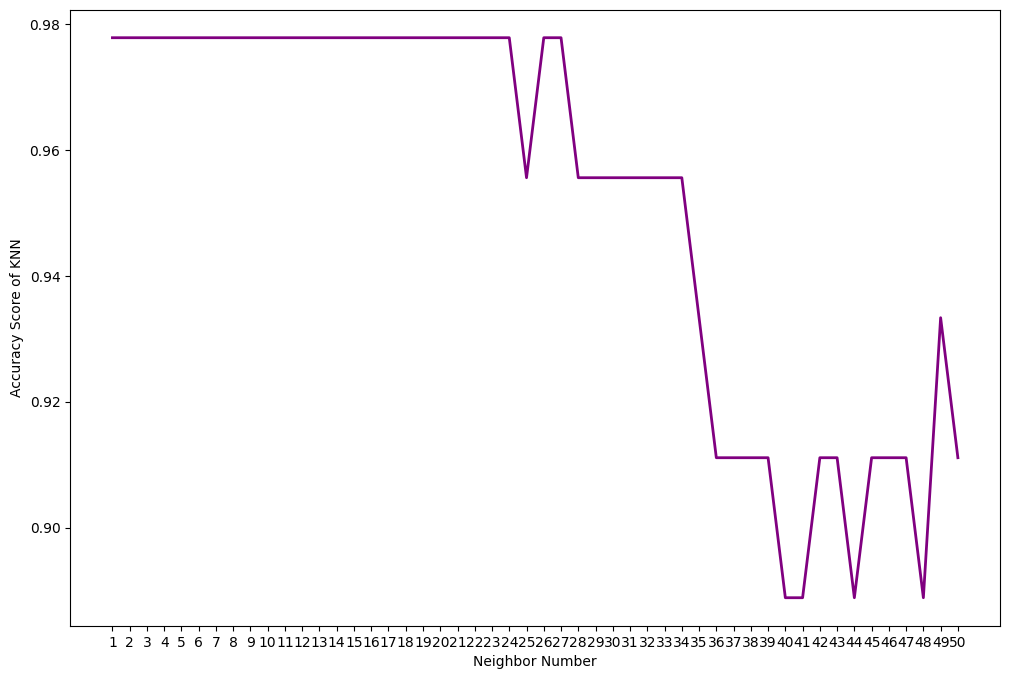

In [22]:
# Creating lists to store accuracy scores for different n_neighbors values
k_range = range(1, 51)
accuracy_scores = []

# Iterate through different values of n_neighbors
for k in k_range:
    # Create a KNN classifier with the current value of n_neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_classifier.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(12,8))
# create a line graph for showing accuracy score (scores_list) for respective number of neighbors used in the KNN model
plt.plot(k_range, accuracy_scores, linewidth=2, color='purple')
# values for x-axis should be the number of neighbors stored in kRange
plt.xticks(k_range)
plt.xlabel('Neighbor Number')
plt.ylabel('Accuracy Score of KNN')
plt.show()

In [23]:
# Find the best value of n_neighbors with the highest accuracy
best_k = k_range[accuracy_scores.index(max(accuracy_scores))]
best_accuracy = max(accuracy_scores)

print(f"Best number of neighbors: {best_k}")
print(f"Highest accuracy: {best_accuracy}")

Best number of neighbors: 1
Highest accuracy: 0.9777777777777777


In [24]:
# Creating a KNN model with best parameters i.e., number of neighbors = 23
classifier_knn = KNeighborsClassifier(n_neighbors = 1)

# fit training data to the KNN model
classifier_knn.fit(X_train,y_train)
# evaluate test data on the model
pred = classifier_knn.predict(X_test)
# show regression score
KNNAcc = accuracy_score(y_test, pred)
print('K-Nearest Neighbors Classifier accuracy: {:.2f}%'.format(KNNAcc*100))

K-Nearest Neighbors Classifier accuracy: 97.78%


3.Decision Tree Classifier

In [25]:
# create a decision tree classifier object
dt = DecisionTreeClassifier()
# train the model on the training dataset
dt.fit(X_train, y_train)
# make predictions on the test data
y_pred = dt.predict(X_test)
# calculate accuracy
DTCAcc = accuracy_score(y_test, y_pred)
print('Decision Tree Classifier accuracy: {:.2f}%'.format(KNNAcc*100))
# create a decision tree classifier object
dt = DecisionTreeClassifier()
# train the model on the training dataset
dt.fit(X_train, y_train)
# make predictions on the test data
y_pred = dt.predict(X_test)
# calculate accuracy
DTCAcc = accuracy_score(y_test, y_pred)
print('Decision Tree Classifier accuracy: {:.2f}%'.format(KNNAcc*100))

Decision Tree Classifier accuracy: 97.78%
Decision Tree Classifier accuracy: 97.78%


4.Random Forest Classifier

In [26]:
# create a decision tree classifier object
rf = RandomForestClassifier()
# train the model on the training dataset
rf.fit(X_train, y_train)
# make predictions on the test data
y_pred = rf.predict(X_test)
# calculate accuracy
RFCAcc = accuracy_score(y_test, y_pred)
print('Random Forest Classifier accuracy: {:.2f}%'.format(RFCAcc*100))

Random Forest Classifier accuracy: 97.78%
